In [15]:
%matplotlib inline
import aesara
# import theano.tensor as tt
import aesara.tensor as tt
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
from pandas_datareader.data import DataReader
from pandas.plotting import register_matplotlib_converters
plt.style.use('seaborn')
register_matplotlib_converters()

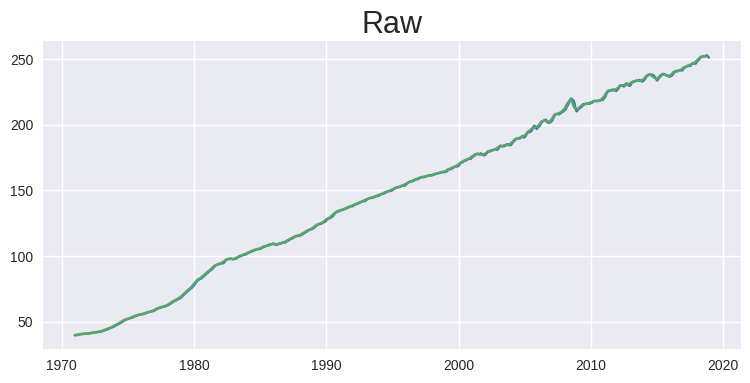

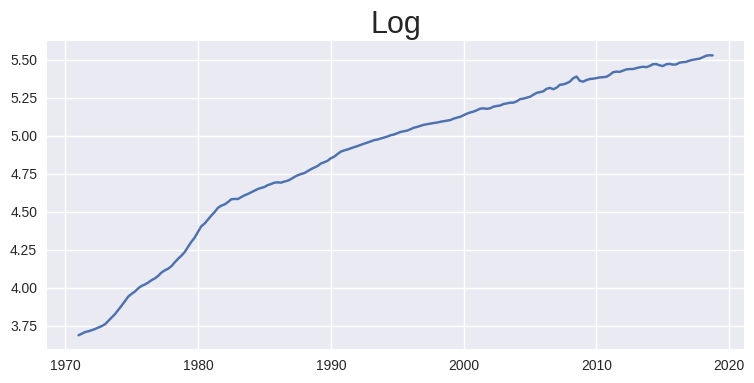

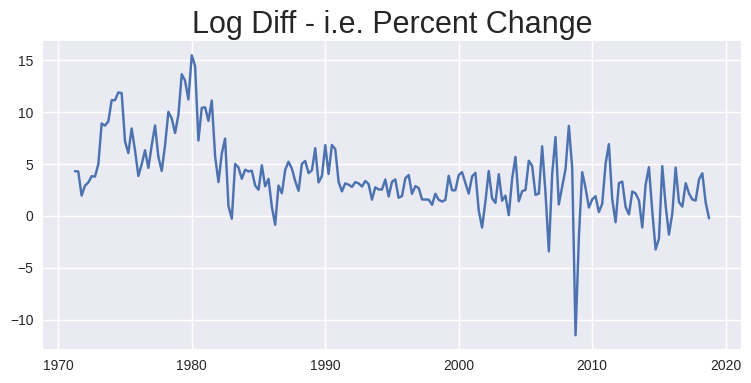

In [31]:
cpi = DataReader('CPIAUCNS', 'fred', start='1971-01', end='2018-12')
cpi.index = pd.DatetimeIndex(cpi.index, freq='MS')

f, ax = plt.subplots(figsize=[9,4])
ax.plot(cpi['CPIAUCNS'])
ax.plot(cpi['CPIAUCNS'].resample('QS').mean())
ax.set_title('Raw', fontsize=22)
plt.show()

cpi_log = np.log(cpi).resample('QS').mean()
f, ax = plt.subplots(figsize=[9,4])
ax.plot(cpi_log)
ax.set_title('Log', fontsize=22)
plt.show()


inf = np.log(cpi).resample('QS').mean().diff()[1:] * 400
inf.head(), cpi.head()

f, ax = plt.subplots(figsize=[9,4])
ax.plot(inf)
ax.set_title('Log Diff - i.e. Percent Change', fontsize=22)
plt.show()

In [20]:
mod = sm.tsa.statespace.SARIMAX(inf, order=(1, 0, 1)); mod
res_mle = mod.fit(disp=False)
print(res_mle.summary())

                               SARIMAX Results                                
Dep. Variable:               CPIAUCNS   No. Observations:                  191
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -448.685
Date:                Sat, 01 May 2021   AIC                            903.370
Time:                        16:51:35   BIC                            913.127
Sample:                    04-01-1971   HQIC                           907.322
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9785      0.015     64.545      0.000       0.949       1.008
ma.L1         -0.6342      0.057    -11.073      0.000      -0.747      -0.522
sigma2         6.3682      0.323     19.695      0.0

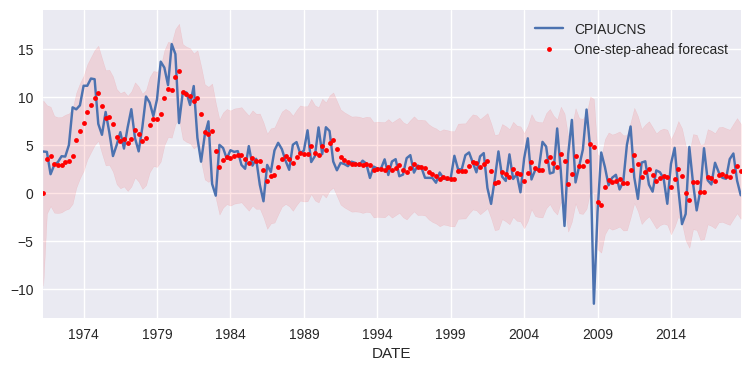

In [30]:
predict_mle = res_mle.get_prediction()
predict_mle_ci = predict_mle.conf_int(); predict_mle_ci
lower = predict_mle_ci['lower CPIAUCNS']
upper = predict_mle_ci['upper CPIAUCNS']

f, ax = plt.subplots(figsize=[9,4])
inf.plot(ax=ax, ls='-', label='Observed')

predict_mle.predicted_mean.plot(ax=ax, ls='', marker='.', color='r', label='One-step-ahead forecast')
ax.fill_between(predict_mle_ci.index, lower, upper, color='r', alpha=0.1)
ax.legend();